# EE 399) HW #5
## Github Link: https://github.com/garcimat/EE-399/tree/main/HW5

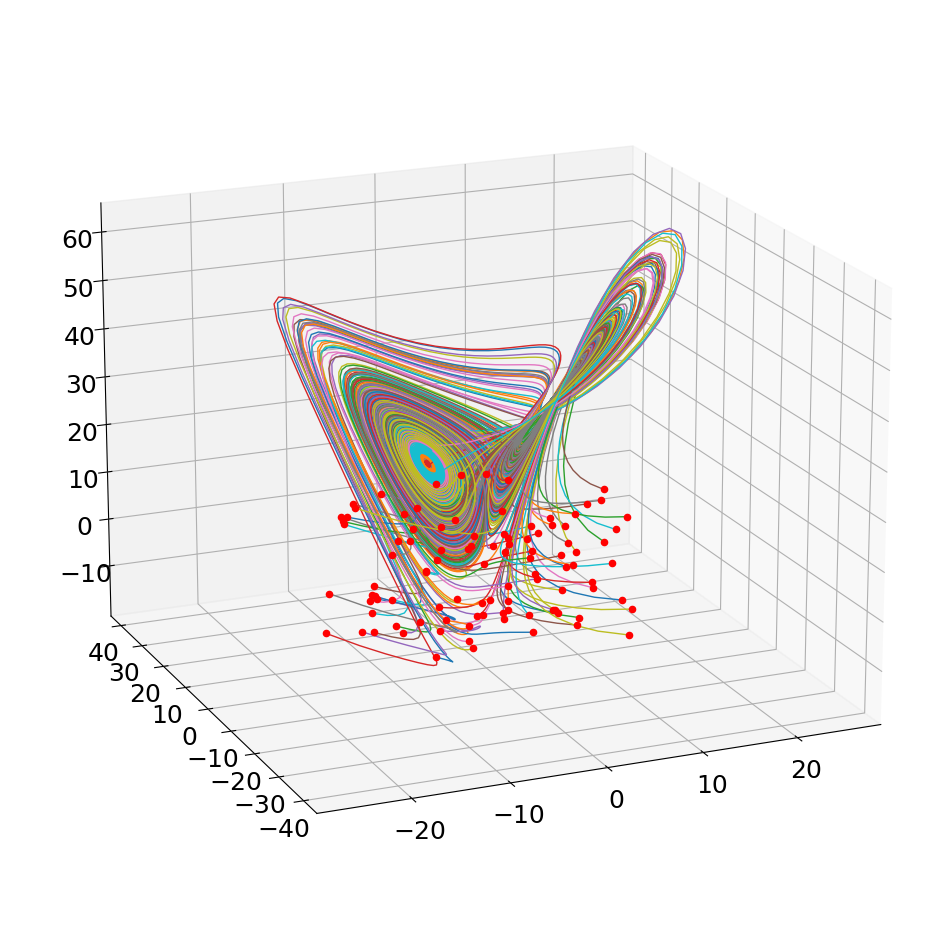

In [1]:
# 1.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28


nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch 1/100, Loss: 261.7199
Epoch 2/100, Loss: 182.0767
Epoch 3/100, Loss: 123.0336
Epoch 4/100, Loss: 38.3879
Epoch 5/100, Loss: 14.0555
Epoch 6/100, Loss: 0.8354
Epoch 7/100, Loss: 5.2889
Epoch 8/100, Loss: 5.1021
Epoch 9/100, Loss: 0.3491
Epoch 10/100, Loss: 4.0994
Epoch 11/100, Loss: 0.9581
Epoch 12/100, Loss: 1.1292
Epoch 13/100, Loss: 0.3536
Epoch 14/100, Loss: 1.5596
Epoch 15/100, Loss: 1.3252
Epoch 16/100, Loss: 1.5228
Epoch 17/100, Loss: 1.1620
Epoch 18/100, Loss: 0.5488
Epoch 19/100, Loss: 0.2252
Epoch 20/100, Loss: 0.3941
Epoch 21/100, Loss: 0.7025
Epoch 22/100, Loss: 0.3279
Epoch 23/100, Loss: 0.1556
Epoch 24/100, Loss: 0.6215
Epoch 25/100, Loss: 0.2044
Epoch 26/100, Loss: 0.2220
Epoch 27/100, Loss: 0.1939
Epoch 28/100, Loss: 0.5117
Epoch 29/100, Loss: 0.2453
Epoch 30/100, Loss: 0.2294
Epoch 31/100, Loss: 0.2451
Epoch 32/100, Loss: 0.3557
Epoch 33/100, Loss: 0.1595
Epoch 34/10

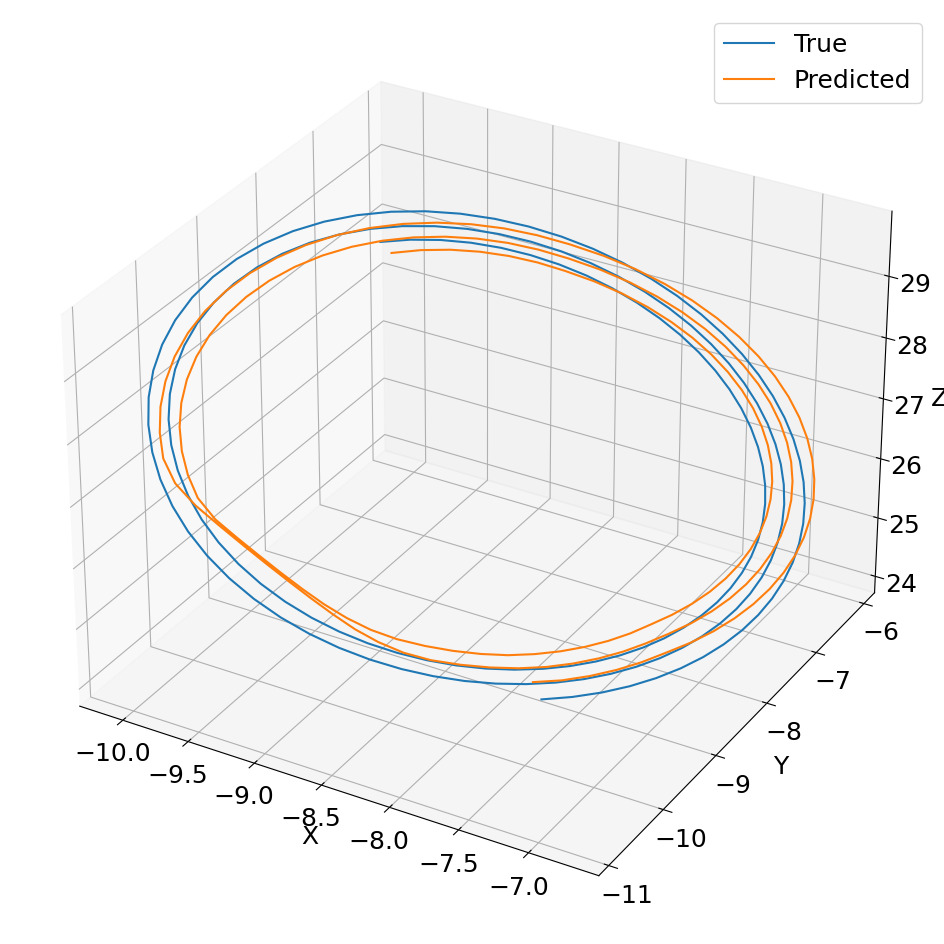

In [2]:
# 1.
!pip install torch

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

class LorenzNN(nn.Module):
    def __init__(self):
        super(LorenzNN, self).__init__()
        self.fc1 = nn.Linear(3, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Select the desired rho value (10, 28, or 40)
rho_value = 35

# Filter the input and output data based on the rho value
filtered_input = nn_input[rho_value*(len(t)-1):(rho_value+1)*(len(t)-1), :]
filtered_output = nn_output[rho_value*(len(t)-1):(rho_value+1)*(len(t)-1), :]

# Convert the NumPy arrays to PyTorch tensors
input_tensor = torch.from_numpy(filtered_input).float()
output_tensor = torch.from_numpy(filtered_output).float()

# Split the data into training and testing sets (80% for training, 20% for testing)
train_size = int(0.8 * len(input_tensor))
train_input, test_input = input_tensor[:train_size], input_tensor[train_size:]
train_output, test_output = output_tensor[:train_size], output_tensor[train_size:]

# Create PyTorch data loaders
train_dataset = torch.utils.data.TensorDataset(train_input, train_output)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# Create an instance of the LorenzNN model
model = LorenzNN()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the number of training epochs
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

    # Print the loss for every epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

# Switch the model to evaluation mode
model.eval()

# Perform inference on the test data
with torch.no_grad():
    test_inputs = test_input
    test_targets = test_output
    test_outputs = model(test_inputs)

# Convert the tensors to NumPy arrays
test_inputs = test_inputs.numpy()
test_targets = test_targets.numpy()
test_outputs = test_outputs.numpy()

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(test_targets[:, 0], test_targets[:, 1], test_targets[:, 2], label='True')
ax.plot(test_outputs[:, 0], test_outputs[:, 1], test_outputs[:, 2], label='Predicted')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

Epoch 1/100, Loss: 256.4816
Epoch 2/100, Loss: 251.1666
Epoch 3/100, Loss: 245.9061
Epoch 4/100, Loss: 240.7019
Epoch 5/100, Loss: 235.5548
Epoch 6/100, Loss: 230.4658
Epoch 7/100, Loss: 225.4361
Epoch 8/100, Loss: 220.4665
Epoch 9/100, Loss: 215.5578
Epoch 10/100, Loss: 210.7107
Epoch 11/100, Loss: 205.9259
Epoch 12/100, Loss: 201.2041
Epoch 13/100, Loss: 196.5456
Epoch 14/100, Loss: 191.9509
Epoch 15/100, Loss: 187.4203
Epoch 16/100, Loss: 182.9539
Epoch 17/100, Loss: 178.5520
Epoch 18/100, Loss: 174.2145
Epoch 19/100, Loss: 169.9416
Epoch 20/100, Loss: 165.7336
Epoch 21/100, Loss: 161.5897
Epoch 22/100, Loss: 157.5092
Epoch 23/100, Loss: 153.4911
Epoch 24/100, Loss: 149.5345
Epoch 25/100, Loss: 145.6384
Epoch 26/100, Loss: 141.8017
Epoch 27/100, Loss: 138.0232
Epoch 28/100, Loss: 134.3036
Epoch 29/100, Loss: 130.6438
Epoch 30/100, Loss: 127.0445
Epoch 31/100, Loss: 123.5054
Epoch 32/100, Loss: 120.0268
Epoch 33/100, Loss: 116.6086
Epoch 34/100, Loss: 113.2506
Epoch 35/100, Loss: 109

/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:210: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:210: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


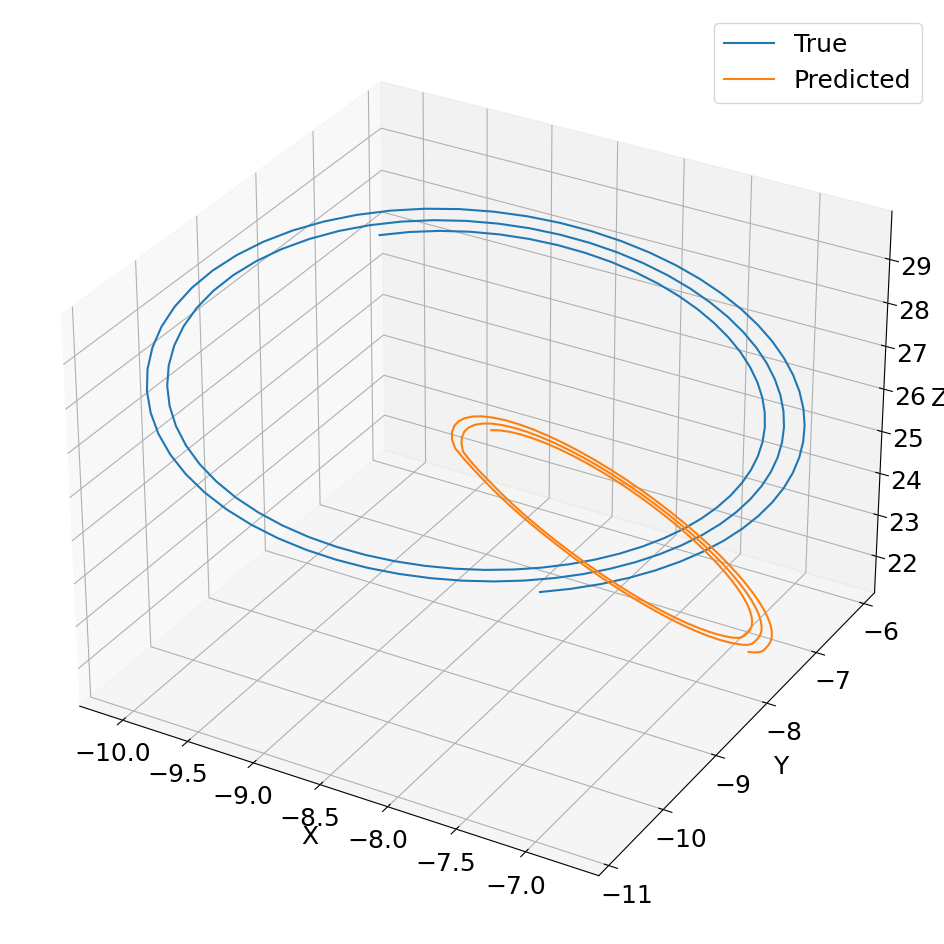

In [3]:
# 2.
# Feed-Forward Neural Network

class LorenzFFNN(nn.Module):
    def __init__(self):
        super(LorenzFFNN, self).__init__()
        self.fc1 = nn.Linear(3, 32)
        self.fc2 = nn.Linear(32, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Select the desired rho value (10, 28, or 40)
rho_value = 35

# Filter the input and output data based on the rho value
filtered_input = nn_input[rho_value*(len(t)-1):(rho_value+1)*(len(t)-1), :]
filtered_output = nn_output[rho_value*(len(t)-1):(rho_value+1)*(len(t)-1), :]

# Convert the NumPy arrays to PyTorch tensors
input_tensor = torch.from_numpy(filtered_input).float()
output_tensor = torch.from_numpy(filtered_output).float()

# Split the data into training and testing sets (80% for training, 20% for testing)
train_size = int(0.8 * len(input_tensor))
train_input, test_input = input_tensor[:train_size], input_tensor[train_size:]
train_output, test_output = output_tensor[:train_size], output_tensor[train_size:]

# Create an instance of the LorenzFFNN model
model = LorenzFFNN()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the number of training epochs
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(train_input)

    # Compute the loss
    loss = criterion(outputs, train_output)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss for every epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

# Switch the model to evaluation mode
model.eval()

# Perform inference on the test data
with torch.no_grad():
    test_outputs = model(test_input)

# Convert the tensors to NumPy arrays
test_outputs = test_outputs.numpy()

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(test_output[:, 0], test_output[:, 1], test_output[:, 2], label='True')
ax.plot(test_outputs[:, 0], test_outputs[:, 1], test_outputs[:, 2], label='Predicted')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

Epoch 1/100, Loss: 302.5680
Epoch 2/100, Loss: 302.1680
Epoch 3/100, Loss: 301.7645
Epoch 4/100, Loss: 301.3575
Epoch 5/100, Loss: 300.9470
Epoch 6/100, Loss: 300.5332
Epoch 7/100, Loss: 300.1159
Epoch 8/100, Loss: 299.6952
Epoch 9/100, Loss: 299.2710
Epoch 10/100, Loss: 298.8433
Epoch 11/100, Loss: 298.4118
Epoch 12/100, Loss: 297.9768
Epoch 13/100, Loss: 297.5380
Epoch 14/100, Loss: 297.0955
Epoch 15/100, Loss: 296.6491
Epoch 16/100, Loss: 296.1989
Epoch 17/100, Loss: 295.7450
Epoch 18/100, Loss: 295.2873
Epoch 19/100, Loss: 294.8259
Epoch 20/100, Loss: 294.3608
Epoch 21/100, Loss: 293.8922
Epoch 22/100, Loss: 293.4200
Epoch 23/100, Loss: 292.9444
Epoch 24/100, Loss: 292.4652
Epoch 25/100, Loss: 291.9826
Epoch 26/100, Loss: 291.4963
Epoch 27/100, Loss: 291.0062
Epoch 28/100, Loss: 290.5121
Epoch 29/100, Loss: 290.0135
Epoch 30/100, Loss: 289.5099
Epoch 31/100, Loss: 289.0010
Epoch 32/100, Loss: 288.4859
Epoch 33/100, Loss: 287.9640
Epoch 34/100, Loss: 287.4344
Epoch 35/100, Loss: 286

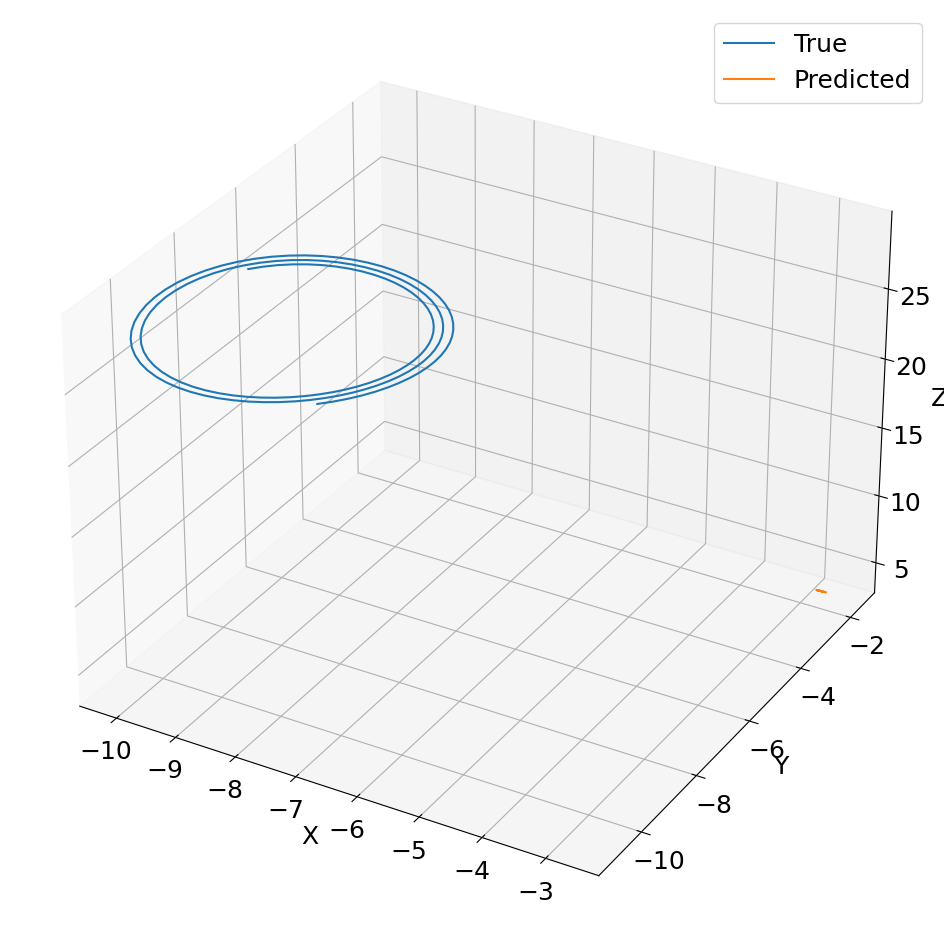

In [10]:
# LSTM Neural Network

class LorenzLSTM(nn.Module):
    def __init__(self):
        super(LorenzLSTM, self).__init__()
        self.lstm = nn.LSTM(3, 32, batch_first=True)
        self.fc = nn.Linear(32, 3)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return out

# Select the desired rho value (10, 28, or 40)
rho_value = 35

# Filter the input and output data based on the rho value
filtered_input = nn_input[rho_value*(len(t)-1):(rho_value+1)*(len(t)-1), :]
filtered_output = nn_output[rho_value*(len(t)-1):(rho_value+1)*(len(t)-1), :]

# Convert the NumPy arrays to PyTorch tensors
input_tensor = torch.from_numpy(filtered_input).float()
output_tensor = torch.from_numpy(filtered_output).float()

# Reshape the input tensors to have an additional dimension for sequence length
input_tensor = input_tensor.unsqueeze(1)  # Add dimension for sequence length
output_tensor = output_tensor.unsqueeze(1)  # Add dimension for sequence length

# Split the data into training and testing sets (80% for training, 20% for testing)
train_size = int(0.8 * len(input_tensor))
train_input, test_input = input_tensor[:train_size], input_tensor[train_size:]
train_output, test_output = output_tensor[:train_size], output_tensor[train_size:]

# Create an instance of the LorenzLSTM model
model = LorenzLSTM()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the number of training epochs
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(train_input)

    # Compute the loss
    loss = criterion(outputs, train_output)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss for every epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

# Switch the model to evaluation mode
model.eval()

# Perform inference on the test data
with torch.no_grad():
    test_outputs = model(test_input)

# Convert the tensors to NumPy arrays and remove the extra dimension
test_output = test_output.squeeze(1).numpy()
test_outputs = test_outputs.squeeze(1).numpy()

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(test_output[:, 0], test_output[:, 1], test_output[:, 2], label='True')
ax.plot(test_outputs[:, 0], test_outputs[:, 1], test_outputs[:, 2], label='Predicted')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

Epoch 1/100, Loss: 301.4112
Epoch 2/100, Loss: 299.8983
Epoch 3/100, Loss: 298.4042
Epoch 4/100, Loss: 296.9285
Epoch 5/100, Loss: 295.4705
Epoch 6/100, Loss: 294.0304
Epoch 7/100, Loss: 292.6088
Epoch 8/100, Loss: 291.2059
Epoch 9/100, Loss: 289.8217
Epoch 10/100, Loss: 288.4561
Epoch 11/100, Loss: 287.1085
Epoch 12/100, Loss: 285.7781
Epoch 13/100, Loss: 284.4642
Epoch 14/100, Loss: 283.1659
Epoch 15/100, Loss: 281.8824
Epoch 16/100, Loss: 280.6127
Epoch 17/100, Loss: 279.3561
Epoch 18/100, Loss: 278.1121
Epoch 19/100, Loss: 276.8800
Epoch 20/100, Loss: 275.6593
Epoch 21/100, Loss: 274.4495
Epoch 22/100, Loss: 273.2501
Epoch 23/100, Loss: 272.0607
Epoch 24/100, Loss: 270.8808
Epoch 25/100, Loss: 269.7100
Epoch 26/100, Loss: 268.5479
Epoch 27/100, Loss: 267.3940
Epoch 28/100, Loss: 266.2480
Epoch 29/100, Loss: 265.1096
Epoch 30/100, Loss: 263.9786
Epoch 31/100, Loss: 262.8546
Epoch 32/100, Loss: 261.7376
Epoch 33/100, Loss: 260.6273
Epoch 34/100, Loss: 259.5238
Epoch 35/100, Loss: 258

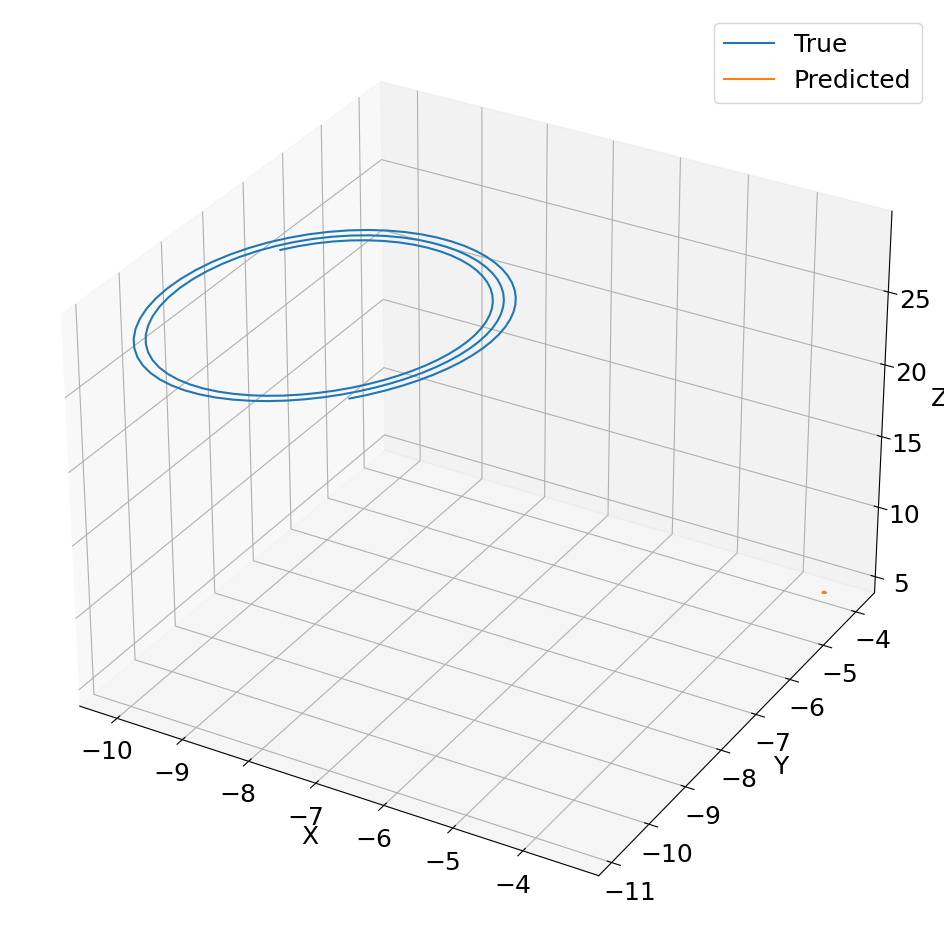

In [5]:
# RNN

class LorenzRNN(nn.Module):
    def __init__(self):
        super(LorenzRNN, self).__init__()
        self.rnn = nn.RNN(3, 32, batch_first=True)
        self.fc = nn.Linear(32, 3)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Select the desired rho value (10, 28, or 40)
rho_value = 35

# Filter the input and output data based on the rho value
filtered_input = nn_input[rho_value*(len(t)-1):(rho_value+1)*(len(t)-1), :]
filtered_output = nn_output[rho_value*(len(t)-1):(rho_value+1)*(len(t)-1), :]

# Convert the NumPy arrays to PyTorch tensors
input_tensor = torch.from_numpy(filtered_input).float()
output_tensor = torch.from_numpy(filtered_output).float()

# Reshape the input tensors to have an additional dimension for sequence length
input_tensor = input_tensor.unsqueeze(1)  # Add dimension for sequence length
output_tensor = output_tensor.unsqueeze(1)  # Add dimension for sequence length

# Split the data into training and testing sets (80% for training, 20% for testing)
train_size = int(0.8 * len(input_tensor))
train_input, test_input = input_tensor[:train_size], input_tensor[train_size:]
train_output, test_output = output_tensor[:train_size], output_tensor[train_size:]

# Create an instance of the LorenzRNN model
model = LorenzRNN()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the number of training epochs
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(train_input)

    # Compute the loss
    loss = criterion(outputs, train_output)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss for every epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

# Switch the model to evaluation mode
model.eval()

# Perform inference on the test data
with torch.no_grad():
    test_outputs = model(test_input)

# Convert the tensors to NumPy arrays and remove the extra dimension
test_output = test_output.squeeze(1).numpy()
test_outputs = test_outputs.squeeze(1).numpy()

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(test_output[:, 0], test_output[:, 1], test_output[:, 2], label='True')
ax.plot(test_outputs[:, 0], test_outputs[:, 1], test_outputs[:, 2], label='Predicted')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [6]:
!pip install pyESN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from scipy import integrate
from pyESN import ESN

def lorenz_deriv(x_y_z, t0, sigma=10, beta=8/3, rho=28):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

def integrate_lorenz(x0, t):
    x_t = integrate.odeint(lorenz_deriv, x0, t)
    return x_t[:-1, :], x_t[1:, :]

input_size = 3  # Number of input dimensions
output_size = 3  # Number of output dimensions
reservoir_size = 500  # Number of reservoir neurons
spectral_radius = 1.25  # Spectral radius of the reservoir matrix
leakage = 0.3  # Leak rate for the reservoir neurons
regression_parameters = [1e-2]  # Ridge regression parameter

train_length = int(2 / dt)  # Number of time steps used for training
prediction_length = int(1 / dt)  # Number of time steps to predict

def train_and_predict(x0, t, rho):
    x_train, y_train = integrate_lorenz(x0, t[:train_length])

    # Create and train the ESN
    esn = ESN(n_inputs=input_size, n_outputs=output_size, n_reservoir=reservoir_size,
              spectral_radius=spectral_radius, leaking_rate=leakage,
              regression_parameters=regression_parameters)

    esn.fit(x_train, y_train)

    # Predict using the ESN
    x_test = x_train[-1]
    y_predicted = np.zeros((prediction_length, output_size))

    for i in range(prediction_length):
        y_predicted[i] = esn.predict(x_test)
        x_test = np.vstack((x_test[1:], y_predicted[i]))

    return y_predicted

rhos = [10, 28, 40]  # Values of rho to test

for rho in rhos:
    x0 = -15 + 30 * np.random.random((100, input_size))
    y_predicted = train_and_predict(x0, t, rho)

    # Plot the predicted trajectories
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(y_predicted)):
        ax.plot(y_predicted[i][:, 0], y_predicted[i][:, 1], y_predicted[i][:, 2], linewidth=1)

    ax.view_init(18, -113)
    ax.set_title(f'Lorenz system (rho = {rho})')
    plt.show()

rhos = [10, 28, 40]  # Values of rho to test

for rho in rhos:
    x0 = -15 + 30 * np.random.random((100, input_size))
    y_predicted = train_and_predict(x0, t, rho)

    # Plot the predicted trajectories
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(y_predicted)):
        ax.plot(y_predicted[i][:, 0], y_predicted[i][:, 1], y_predicted[i][:, 2], linewidth=1)

    ax.view_init(18, -113)
    ax.set_title(f'Lorenz system (rho = {rho})')
    plt.show()

ModuleNotFoundError: ignored